# Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
np.random.seed(0)
from scipy import stats
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import MinMaxScaler

# Load in Data

## Basic Stats 

In [2]:
bs89 = pd.read_csv('basic_stats_18_19.csv', index_col = 0)

In [3]:
bs89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP', 'G', 'A', 'PTS▼', '+/-', 'PIM',
       'PS', 'EV', 'PP', 'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'S%', 'TOI',
       'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'FO%'],
      dtype='object')

In [4]:
bs89.drop(['PS'], axis = 1, inplace = True)

In [5]:
bs89.rename(columns = {'PTS▼': 'PTS', 'EV': 'EVG', 'PP': 'PPG', 'SH': 'SHG', 'EV.1': 'EVA', 'PP.1': 'PPA', 'SH.1': 'SHA'}, inplace = True)

## Advanced Stats 

In [6]:
as89 = pd.read_csv('advanced_stats_18_19.csv', index_col = 0)

In [7]:
as89.head()

,Player,Age,Tm,Pos,GP▼,CF,CA,CF%,CF% rel,FF,...,PDO,oZS%,dZS%,TOI/60,TOI(EV),TK,GV,E+/-,SAtt.,Thru%
Rk,,,,,,,,,,,,,,,,,,,,,
1,Marcus Pettersson\pettema01,22,TOT,D,84,1205,1190,50.3,3.5,889,...,101.8,49.9,50.1,16:41,14:56,24,43,5.5,221,39.4
2,Kevin Fiala\fialake01,22,TOT,LW,83,1165,1044,52.7,0.9,888,...,96.4,63.6,36.4,15:38,13:24,44,68,-3.2,316,55.1
3,Ryan Hartman\hartmry01,24,TOT,RW,83,973,952,50.5,-1.3,712,...,100.3,44.5,55.5,13:07,12:23,35,38,-7.7,245,59.2
4,Sebastian Aho\ahose01,21,CAR,C,82,1556,1164,57.2,3.4,1191,...,100.7,59.2,40.8,20:09,16:03,81,64,21.7,466,52.1
5,Josh Anderson\anderjo05,24,CBJ,RW,82,1129,1136,49.8,-0.4,854,...,103.9,46.4,53.6,17:01,14:19,46,19,5.3,383,60.1


In [8]:
as89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP▼', 'CF', 'CA', 'CF%', 'CF% rel', 'FF',
       'FA', 'FF%', 'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%',
       'TOI/60', 'TOI(EV)', 'TK', 'GV', 'E+/-', 'SAtt.', 'Thru%'],
      dtype='object')

In [9]:
as89.drop(['Age', 'Tm', 'Pos', 'GP▼', 'CF% rel'], axis = 1, inplace = True)

## Time On Ice Stats 

In [10]:
toi89 = pd.read_csv('TOI_18_19.csv', index_col = 0)

In [11]:
toi89.columns

Index(['Player', 'Tm', 'Pos', 'Shift', 'GP▼', 'Unnamed: 6', 'TOI', 'CF% Rel',
       'GF/60', 'GA/60', 'Unnamed: 11', 'TOI.1', 'CF% Rel.1', 'GF/60.1',
       'GA/60.1', 'Unnamed: 16', 'TOI.2', 'CF% Rel.2', 'GF/60.2', 'GA/60.2'],
      dtype='object')

In [12]:
toi89.drop(['Tm', 'Pos', 'GP▼', 'Unnamed: 6', 'Unnamed: 11', 'Unnamed: 16'], axis = 1, inplace = True)

In [13]:
toi89.rename(columns = {'TOI': 'EV_TOI', 'CF% Rel': 'EV_CF%_Rel', 
                        'GF/60': 'EV_GFP60', 'GA/60': 'EV_GAP60', 
                        'TOI.1': 'PP_TOI', 'CF% Rel.1': 'PP_CF%_Rel',
                        'GF/60.1': 'PP_GFP60', 'GA/60.1': 'PP_GAP60',
                        'TOI.2': 'SH_TOI', 'CF% Rel.2': 'SH_CF%_Rel',
                        'GF/60.2': 'SH_GFP60', 'GA/60.2': 'SH_GAP60'}, inplace = True)

## Misc Stats

In [14]:
misc89 = pd.read_csv('misc_18_19.csv', index_col = 0)

In [15]:
misc89.columns

Index(['Player', 'Age', 'Tm', 'Pos', 'GP▼', 'GC', 'G', 'A', 'PTS', 'GC.1',
       'PIM', 'S', 'G.1', 'A.1', 'PTS.1', 'GC.2', 'TGF', 'PGF', 'TGA', 'PGA',
       '+/-', 'xGF', 'xGA', 'E+/-', 'OPS', 'DPS', 'PS', 'Att.', 'Made', 'Miss',
       'Pct.'],
      dtype='object')

In [16]:
misc89.drop(['Age', 'Tm', 'Pos', 'GP▼', '+/-', 'E+/-', 'Att.', 'Made', 'Miss', 'Pct.'], axis = 1, inplace = True)

In [17]:
misc89.rename(columns = {'G': 'GPG', 'A': 'APG', 'PTS': 'PTSPG', 'GC.1': 'GCPG', 'PIM': 'PIMPG', 'S': 'SPG', 
                         'G.1': 'AG', 'A.1': 'AA', 'PTS.1': 'APTS', 'GC.2': 'AGC'}, inplace = True)

# Merge DataFrames

In [18]:
df1 = pd.merge(bs89, as89, on = ['Player'])

In [19]:
df2 = pd.merge(df1, toi89, on = ['Player'])

In [20]:
df = pd.merge(df2, misc89, on = ['Player'])

In [21]:
df.head()

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,AGC,TGF,PGF,TGA,PGA,xGF,xGA,OPS,DPS,PS
0,Nikita Kucherov\kucheni01,25,TBL,RW,82,41,87,128,24,62,...,46,155,60,71,1,71.5,62.9,12.3,2.3,14.6
1,Connor McDavid\mcdavco01,22,EDM,C,78,41,75,116,3,20,...,43,142,42,107,10,73.7,71.7,10.8,2.1,13.0
2,Patrick Kane\kanepa01,30,CHI,RW,81,44,66,110,2,22,...,43,142,42,98,0,68.6,83.3,10.2,1.6,11.8
3,Leon Draisaitl\draisle01,23,EDM,C,82,50,55,105,2,52,...,43,141,44,109,14,69.1,71.0,10.4,2.2,12.6
4,Sidney Crosby\crosbsi01,31,PIT,C,79,35,65,100,18,36,...,37,139,43,83,5,71.1,52.6,8.9,2.4,11.4


# Clean DataFrame and Add Some Variables

In [22]:
df.drop(['Age', 'Tm'], axis = 1, inplace = True)

In [23]:
df.columns

Index(['Player', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG',
       'SHG', 'GW', 'EVA', 'PPA', 'SHA', 'S', 'S%', 'TOI', 'ATOI', 'BLK',
       'HIT', 'FOW', 'FOL', 'FO%', 'CF', 'CA', 'CF%', 'FF', 'FA', 'FF%',
       'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'oZS%', 'dZS%', 'TOI/60', 'TOI(EV)',
       'TK', 'GV', 'E+/-', 'SAtt.', 'Thru%', 'Shift', 'EV_TOI', 'EV_CF%_Rel',
       'EV_GFP60', 'EV_GAP60', 'PP_TOI', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60',
       'SH_TOI', 'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60', 'GC', 'GPG', 'APG',
       'PTSPG', 'GCPG', 'PIMPG', 'SPG', 'AG', 'AA', 'APTS', 'AGC', 'TGF',
       'PGF', 'TGA', 'PGA', 'xGF', 'xGA', 'OPS', 'DPS', 'PS'],
      dtype='object')

In [24]:
df['EV_TOI']

0      16:11
1      18:47
2      18:43
3      18:05
4      17:13
       ...  
901    10:38
902    15:48
903    12:25
904    13:51
905    15:55
Name: EV_TOI, Length: 906, dtype: object

In [25]:
TOI_stats = ['ATOI', 'TOI/60', 'TOI(EV)', 'EV_TOI', 'PP_TOI', 'SH_TOI', 'Shift']

In [26]:
def convert_TOI_stats(row):
    r = row.split(':')
    return int(r[0])*60+int(r[1])

In [27]:
for col in TOI_stats:
    df[col] = df[col].apply(lambda row: convert_TOI_stats(row))

In [28]:
def clean_player_name(row):
    return row.split('\\')[0]

In [29]:
df['EV_TOI']

0       971
1      1127
2      1123
3      1085
4      1033
       ... 
901     638
902     948
903     745
904     831
905     955
Name: EV_TOI, Length: 906, dtype: int64

In [30]:
df['TOI']

0      1637
1      1781
2      1822
3      1852
4      1658
       ... 
901      43
902      66
903     151
904      73
905     204
Name: TOI, Length: 906, dtype: int64

In [31]:
df['Player'] = df['Player'].apply(lambda x: clean_player_name(x))

In [32]:
df['GPP'] = df['G'] / df['PTS']

In [33]:
df['APP'] = df['A'] / df['PTS']

In [34]:
df['CFP60'] = df['CF'] / df['TOI'] * 60

In [35]:
df['CAP60'] = df['CA'] / df['TOI'] * 60

In [36]:
df['PIMP60'] = df['PIM'] / df['TOI'] * 60

In [37]:
df['FOWP60'] = df['FOW'] / df['TOI'] * 60

In [38]:
df['FOLP60'] = df['FOL'] / df['TOI'] * 60

In [39]:
df['EVG%'] = df['EVG'] / df['G']

In [40]:
df['SHG%'] = df['SHG'] / df['G']

In [41]:
df['PPG%'] = df['PPG'] / df['G']

In [42]:
df['EVA%'] = df['EVA'] / df['A']

In [43]:
df['PPA%'] = df['PPA'] / df['A']

In [44]:
df['SHA%'] = df['SHA'] / df['A']

In [45]:
df['SP60'] = df['S'] / df['TOI'] * 60

In [46]:
df['BLKP60'] = df['BLK'] / df['TOI'] * 60

In [47]:
df['HITP60'] = df['HIT'] / df['TOI'] * 60

In [48]:
df['EVCFP60'] = df['CF'] / df['TOI'] * 60

In [49]:
df['EVCAP60'] = df['CA'] / df['TOI'] * 60

In [50]:
df['TKP60'] = df['TK'] / df['TOI'] * 60

In [51]:
df['GVP60'] = df['GV'] / df['TOI'] * 60

In [52]:
df['SATTP60'] = df['SAtt.'] / df['TOI'] * 60

In [53]:
df['EVTOI%'] = df['EV_TOI'] / df['TOI'] * 60

In [54]:
df['PPTOI%'] = df['PP_TOI'] / df['TOI'] * 60

In [55]:
df['SHTOI%'] = df['SH_TOI'] / df['TOI'] * 60

In [56]:
df['EVEGFP60'] = df['xGF'] / df['TOI'] * 60

In [57]:
df['EVEGAP60'] = df['xGA'] / df['TOI'] * 60

In [58]:
df['GP'].describe()

count    906.000000
mean      50.502208
std       28.743685
min        1.000000
25%       23.000000
50%       60.000000
75%       78.000000
max       84.000000
Name: GP, dtype: float64

In [59]:
df['ATOI'].head()

0    1198
1    1370
2    1349
3    1355
4    1260
Name: ATOI, dtype: int64

In [60]:
for col in df.columns:
    if "TOI" in col:
        print(col)

TOI
ATOI
TOI/60
TOI(EV)
EV_TOI
PP_TOI
SH_TOI
EVTOI%
PPTOI%
SHTOI%


In [61]:
df['ATOI'].describe()

count     906.000000
mean      902.444812
std       260.391108
min       112.000000
25%       716.250000
50%       892.500000
75%      1090.500000
max      1602.000000
Name: ATOI, dtype: float64

In [62]:
df = df.loc[(df['ATOI'] >= 716.25) & (df['GP'] >= 23)]

In [63]:
df.shape

(579, 102)

In [64]:
df.columns

Index(['Player', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG',
       ...
       'EVCFP60', 'EVCAP60', 'TKP60', 'GVP60', 'SATTP60', 'EVTOI%', 'PPTOI%',
       'SHTOI%', 'EVEGFP60', 'EVEGAP60'],
      dtype='object', length=102)

In [65]:
df.isna().sum().head(50)

Player          0
Pos             0
GP              0
G               0
A               0
PTS             0
+/-             0
PIM             0
EVG             0
PPG             0
SHG             0
GW              0
EVA             0
PPA             0
SHA             0
S               0
S%              0
TOI             0
ATOI            0
BLK             0
HIT             0
FOW             0
FOL             0
FO%           191
CF              0
CA              0
CF%             0
FF              0
FA              0
FF%             0
FF% rel         0
oiSH%           0
oiSV%           0
PDO             0
oZS%            0
dZS%            0
TOI/60          0
TOI(EV)         0
TK              0
GV              0
E+/-            0
SAtt.           0
Thru%           0
Shift           0
EV_TOI          0
EV_CF%_Rel      0
EV_GFP60        0
EV_GAP60        0
PP_TOI          0
PP_CF%_Rel     18
dtype: int64

In [66]:
df.isna().sum().tail(50)

SH_TOI         0
SH_CF%_Rel    44
SH_GFP60      20
SH_GAP60      20
GC             0
GPG            0
APG            0
PTSPG          0
GCPG           0
PIMPG          0
SPG            0
AG             0
AA             0
APTS           0
AGC            0
TGF            0
PGF            0
TGA            0
PGA            0
xGF            0
xGA            0
OPS            0
DPS            0
PS             0
GPP            0
APP            0
CFP60          0
CAP60          0
PIMP60         0
FOWP60         0
FOLP60         0
EVG%          22
SHG%          22
PPG%          22
EVA%           0
PPA%           0
SHA%           0
SP60           0
BLKP60         0
HITP60         0
EVCFP60        0
EVCAP60        0
TKP60          0
GVP60          0
SATTP60        0
EVTOI%         0
PPTOI%         0
SHTOI%         0
EVEGFP60       0
EVEGAP60       0
dtype: int64

In [67]:
col_with_na = ['FO%', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60', 'SH_CF%_Rel', 'SH_GFP60', 'SH_GAP60', 'EVG%', 'SHG%', 'PPG%']

In [68]:
for col in col_with_na:
    df[col].fillna(0, inplace = True)

# EDA 

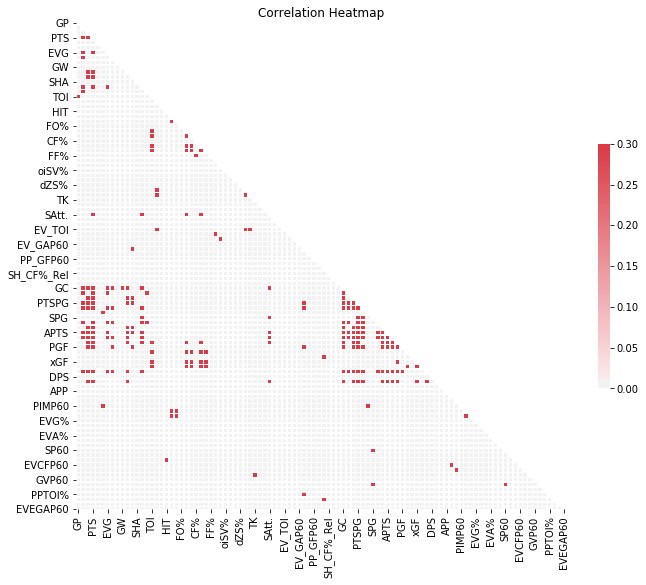

In [69]:
# Compute the correlation matrix
corr = df.corr()>.8

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap')
plt.show()

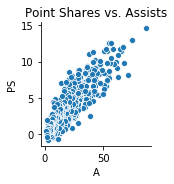

In [70]:
sns.pairplot(df, x_vars = ['A'], y_vars = ['PS'])
plt.title('Point Shares vs. Assists')
plt.show()

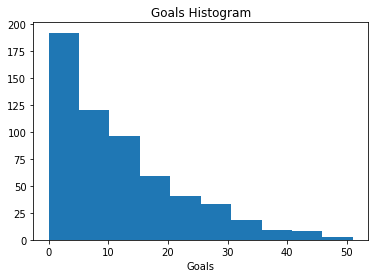

In [71]:
plt.hist(df['G'])
plt.xlabel('Goals')
plt.title('Goals Histogram')
plt.show()

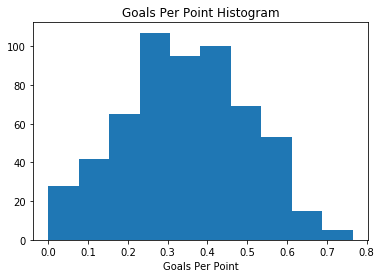

In [72]:
plt.hist(df['GPP'])
plt.xlabel('Goals Per Point')
plt.title('Goals Per Point Histogram')
plt.show()

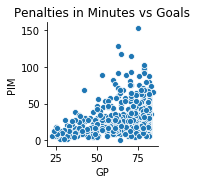

In [73]:
sns.pairplot(df, x_vars = ['GP'], y_vars = ['PIM'])
plt.title('Penalties in Minutes vs Goals')
plt.show()

In [74]:
df.corr()>.8

,GP,G,A,PTS,+/-,PIM,EVG,PPG,SHG,GW,...,EVCFP60,EVCAP60,TKP60,GVP60,SATTP60,EVTOI%,PPTOI%,SHTOI%,EVEGFP60,EVEGAP60
GP,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
G,False,True,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
A,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PTS,False,True,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
+/-,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EVTOI%,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
PPTOI%,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
SHTOI%,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
EVEGFP60,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [75]:
df.columns

Index(['Player', 'Pos', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG',
       ...
       'EVCFP60', 'EVCAP60', 'TKP60', 'GVP60', 'SATTP60', 'EVTOI%', 'PPTOI%',
       'SHTOI%', 'EVEGFP60', 'EVEGAP60'],
      dtype='object', length=102)

In [76]:
remove_columns = ['GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'EVG', 'PPG', 'SHG', 'GW', 'EVA', 
                  'PPA', 'SHA', 'S', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'CF', 'CA', 
                  'CF%', 'FF', 'FA', 'FF%', 'FF% rel', 'oiSH%', 'oiSV%', 'PDO', 'dZS%', 'TOI/60',
                  'TOI(EV)', 'TK', 'GV', 'E+/-', 'SAtt.', 'Shift', 'EV_TOI', 'EV_CF%_Rel', 'EV_GFP60',
                  'EV_GAP60', 'PP_TOI', 'PP_CF%_Rel', 'PP_GFP60', 'PP_GAP60', 'SH_TOI', 'SH_CF%_Rel', 
                  'SH_GFP60', 'SH_GAP60', 'GC', 'GPG', 'APG', 'PTSPG', 'GCPG', 'PIMPG', 'SPG', 'AG', 'AA',
                  'APTS', 'AGC', 'TGF', 'PGF', 'TGA', 'PGA', 'OPS', 'DPS', 'PS', 'xGF', 'xGA', 'FO%', 'FOWP60',
                  'FOLP60']

In [77]:
df.drop(remove_columns, axis = 1, inplace = True)

In [78]:
df.columns

Index(['Player', 'Pos', 'S%', 'oZS%', 'Thru%', 'GPP', 'APP', 'CFP60', 'CAP60',
       'PIMP60', 'EVG%', 'SHG%', 'PPG%', 'EVA%', 'PPA%', 'SHA%', 'SP60',
       'BLKP60', 'HITP60', 'EVCFP60', 'EVCAP60', 'TKP60', 'GVP60', 'SATTP60',
       'EVTOI%', 'PPTOI%', 'SHTOI%', 'EVEGFP60', 'EVEGAP60'],
      dtype='object')

In [79]:
for col1 in df.columns[2:]:
    for col2 in df.columns[2:]:
        if stats.pearsonr(df[col1], df[col2])[0] > .9:
            print((col1, col2))

('S%', 'S%')
('oZS%', 'oZS%')
('Thru%', 'Thru%')
('GPP', 'GPP')
('APP', 'APP')
('CFP60', 'CFP60')
('CFP60', 'EVCFP60')
('CAP60', 'CAP60')
('CAP60', 'EVCAP60')
('PIMP60', 'PIMP60')
('EVG%', 'EVG%')
('SHG%', 'SHG%')
('PPG%', 'PPG%')
('EVA%', 'EVA%')
('PPA%', 'PPA%')
('SHA%', 'SHA%')
('SP60', 'SP60')
('SP60', 'SATTP60')
('BLKP60', 'BLKP60')
('HITP60', 'HITP60')
('EVCFP60', 'CFP60')
('EVCFP60', 'EVCFP60')
('EVCAP60', 'CAP60')
('EVCAP60', 'EVCAP60')
('TKP60', 'TKP60')
('GVP60', 'GVP60')
('SATTP60', 'SP60')
('SATTP60', 'SATTP60')
('EVTOI%', 'EVTOI%')
('PPTOI%', 'PPTOI%')
('SHTOI%', 'SHTOI%')
('EVEGFP60', 'EVEGFP60')
('EVEGAP60', 'EVEGAP60')


# Baseline KMeans Model 

In [80]:
X = df.drop(['Player', 'Pos'], axis = 1)

In [81]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [82]:
k_means_sil_score_max = 0
k_means_sil_score_max_index = 0
num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
for num in num_clusters:
    k_means = KMeans(n_clusters = num)
    k_means.fit(X_scaled)
    labels = k_means.labels_
# #     if metrics.silhouette_score(X, k_means, metric='euclidean') > k_means_sil_score_max:
# #         k_means_sil_score_max = metrics.silhouette_score(X, k_means, metric='euclidean')
# #         k_means_sil_score_max_index = num
    print(num, metrics.silhouette_score(X, labels, metric='euclidean'))
# print(k_means_sil_score_max_index)

2 0.1744770229572277
3 0.07306135320566769
4 0.04457866237245184
5 0.019663874195119682
6 0.00043696249838993663
7 -0.010474279746823951
8 0.01624808451628831
9 0.009149892159025789
10 0.009950699756287066
11 -0.016916166488332558
12 -0.012149906882594624
13 -0.015387866468995886
14 -0.01746028613998952
15 -0.027615960853153935
16 -0.06633144225333268
17 -0.029141859465002275
18 -0.0484301682903246
19 -0.03808673201326801
20 -0.039483131633375884


In [83]:
k_means = KMeans(n_clusters = 3)
k_means.fit(X_scaled)
y_hat = k_means.predict(X_scaled)

In [84]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0,
       2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1,
       2, 2, 2, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2,
       1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2, 1,

In [85]:
df['y_hat'] = y_hat

In [86]:
df_0 = df.loc[df['y_hat'] == 0]

In [87]:
df_1 = df.loc[df['y_hat'] == 1]

In [88]:
df_2 = df.loc[df['y_hat'] == 2]

In [89]:
mean_dict = {}
for var in df.columns[2:]:
    mean_dict[var] = [df_0[var].mean(), df_1[var].mean(), df_2[var].mean()]
print(mean_dict)

{'S%': [3.9416216216216218, 11.197983870967741, 9.865753424657536], 'oZS%': [48.711891891891895, 54.84959677419354, 43.96917808219178], 'Thru%': [47.236756756756755, 56.4524193548387, 58.779452054794525], 'GPP': [0.18696980329035237, 0.39885124248742937, 0.44794686307597736], 'APP': [0.8130301967096477, 0.6011487575125707, 0.5520531369240227], 'CFP60': [49.24410936223688, 50.2887948009496, 46.700879747447026], 'CAP60': [51.23164847962256, 46.88654656270775, 49.330854700654186], 'PIMP60': [1.6224866933493183, 1.476739984158046, 1.8072902250552327], 'EVG%': [0.7640142740142741, 0.7218839749840231, 0.8776120869770663], 'SHG%': [0.032788892788892784, 0.016035100921041955, 0.06105908982122295], 'PPG%': [0.08427791427791427, 0.262080924094935, 0.061328823201710736], 'EVA%': [0.8897929086395702, 0.6825378909781259, 0.9141330421027835], 'PPA%': [0.07880436141483839, 0.30652177181420326, 0.0510571344205958], 'SHA%': [0.03140272994559145, 0.010940337207670804, 0.034809823476620934], 'SP60': [4.2

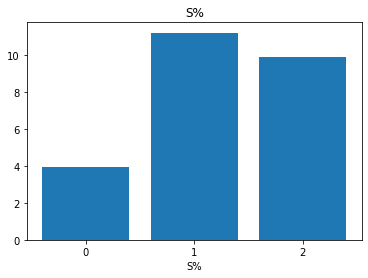

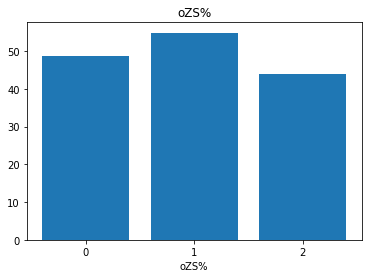

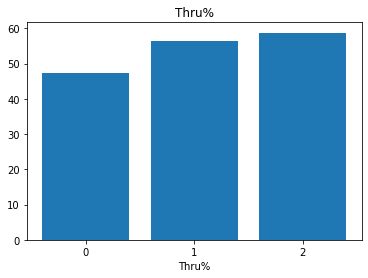

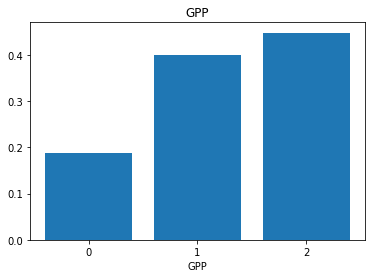

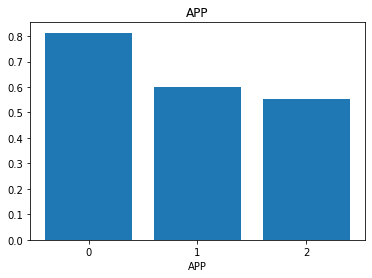

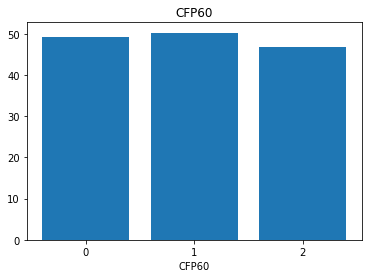

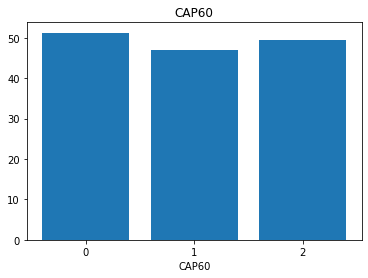

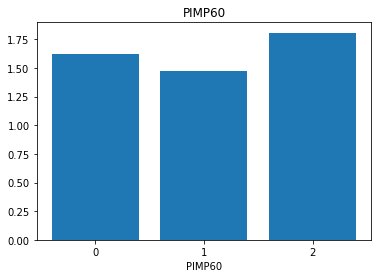

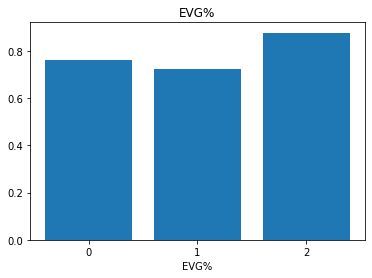

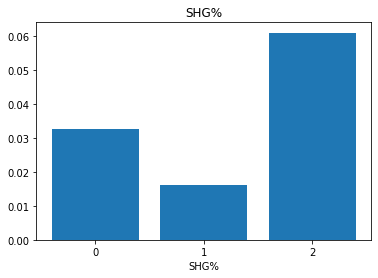

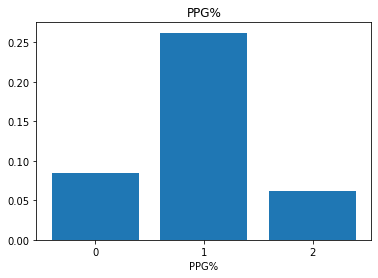

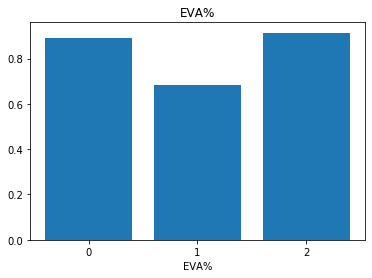

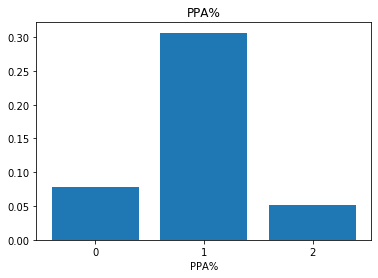

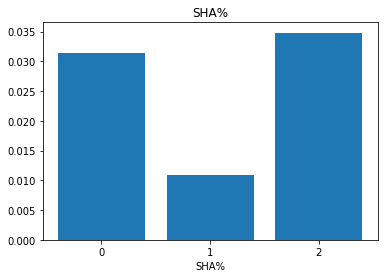

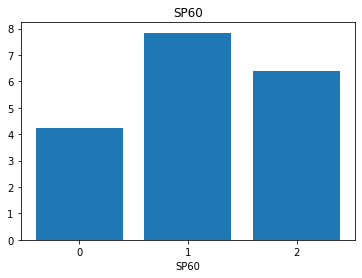

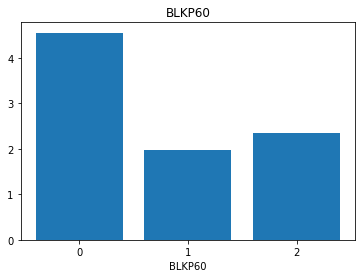

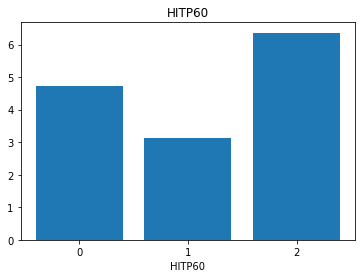

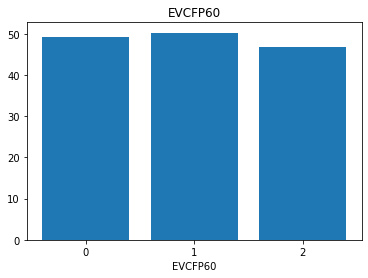

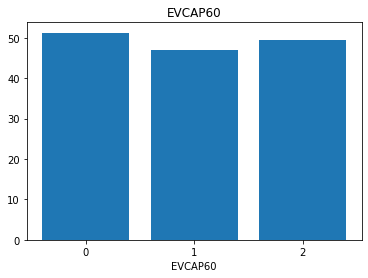

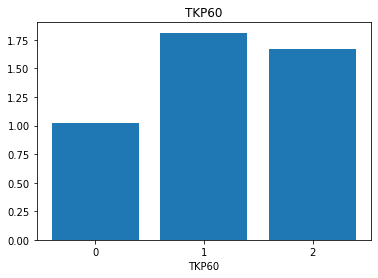

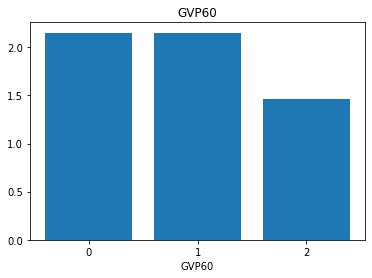

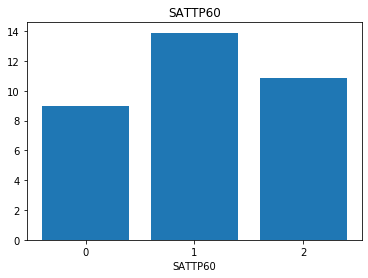

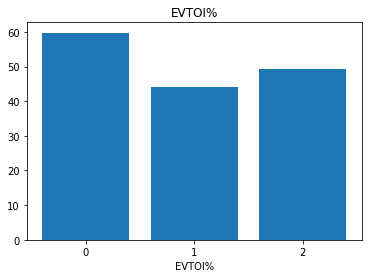

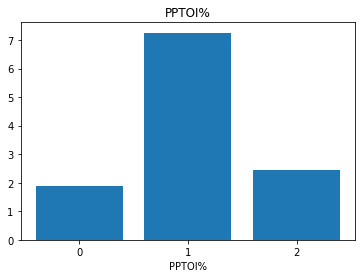

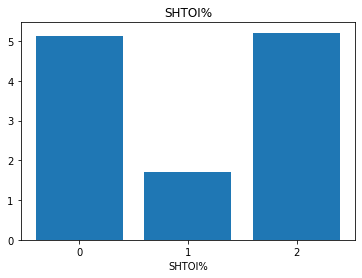

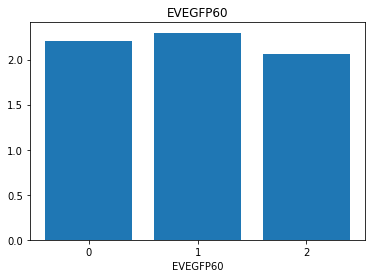

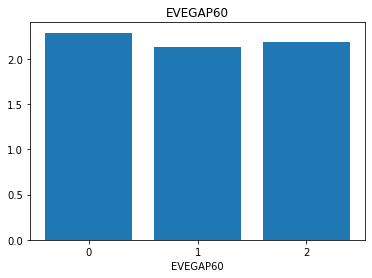

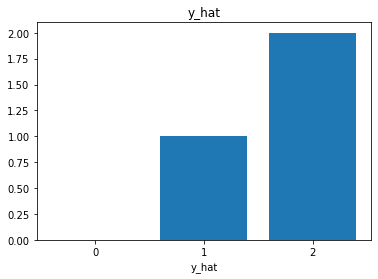

In [90]:
for key, value in mean_dict.items(): 
    plt.bar(['0','1','2'], value)
    plt.title(key)
    plt.xlabel(key)
    plt.show()

In [91]:
agg_clust = AgglomerativeClustering(n_clusters=3)
assigned_clust = agg_clust.fit_predict(X)